In [ ]:
pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 79.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pylab
import pycbc
from pycbc.types import TimeSeries
import math
import pandas as pd

/usr/local/lib/python3.10/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


# **GW190814 Black Hole Binary System Merger:**

signal to noise ratio: 25

distance: 241 Mpc

mass ratio: 0.112 ( smallest yet measured)

second component: either lighest black hole or heaviest neutron star

the spin of the main black hole: ≤0.07

We estimate a merger rate density of $10^-{23}$ $Gpc^{−3}$ $yr^{−1}$

1st blackhole:

mass: 23.2 solar mass

spin: ≤0.07

2nd blackhole:

nature: unclear ( highly unlikely to be a NS)

mass: 2.59 solar mass

GPS Timing: 1249852257

UTC timing: August 14, 2019 21:10:39 (refernce it)



In [ ]:
data=np.loadtxt('GW190814-L1-BH.txt')
data1=pd.DataFrame(data)
data1

,0
0,2.289140e-21
1,9.611460e-22
2,-2.538450e-21
3,-1.234050e-21
4,1.854580e-21
...,...
49147,-9.304420e-22
49148,2.910520e-21
49149,1.231360e-21
49150,-1.597890e-21


In [ ]:
# display few descriptions about the gravitational waves detected:
data1.describe()

,0
count,4.915200e+04
mean,-6.309911e-27
std,1.877158e-21
min,-4.686790e-21
25%,-1.623750e-21
50%,1.134500e-23
75%,1.651628e-21
max,4.539840e-21


In [ ]:
N=len(data1)
data1_fs=4096 # Hz frequency

In [ ]:
# creating the time array:
data1_time=(np.arange(len(data1)))/(data1_fs)
data1_time
# for convenience we will be converting the data into a time series one:
data1_timeseries = TimeSeries(data1, delta_t=1/data1_fs)

Text(0.5, 0, 'Time(sec)')

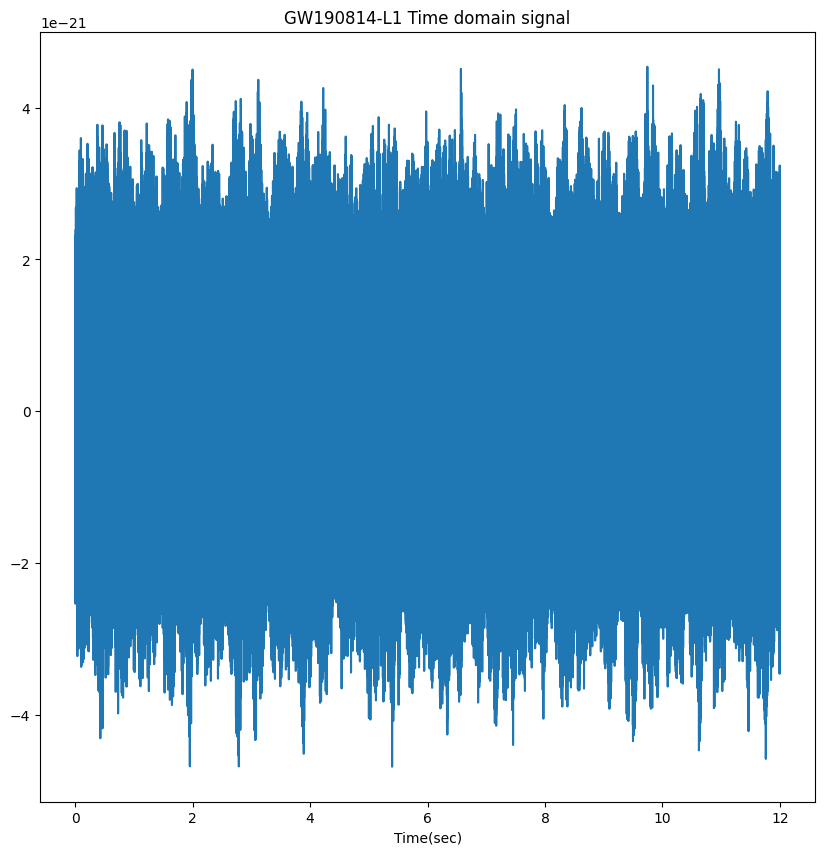

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(data1_time,data1)
plt.title('GW190814-L1 Time domain signal')
plt.xlabel('Time(sec)')

Notice that the data is very pact if we look at with this scale, that is why we will be zooming a bit into fractions of seconds intervals inorder to see the waves as they are rapidly decaying.

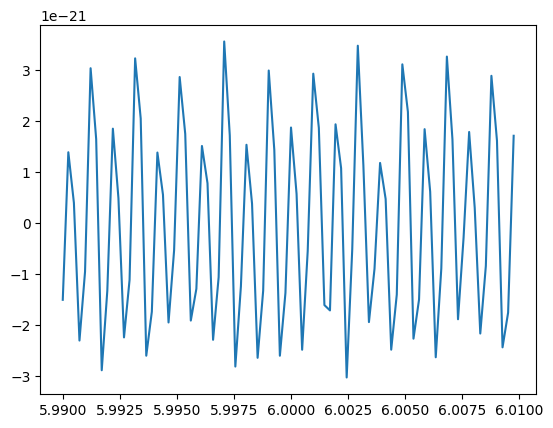

In [ ]:
# A zoomed look on the time domain data of GW190814-L1-BH:
zoom = data1_timeseries.time_slice( 6- .01, 6  + 0.01)
pylab.plot(zoom.sample_times, zoom, label='GW190814-L1')

 # INTERPRETATIONS:
 notice that waves are very weak ~ 10^(-21) which is explained by the fact that the binary black hole system is too far from Earth and thus from the detector used here
 which is the LIvingston detector of LIGO. we can see that we have hundreds of peaks in the data structure and thus referes to gravitational waves dying out fast.
 this is normal to see in black hole gravitational waves data, especially that gravitational waves are produced when two massive objects like black holes and neutran stars
 rotating around each others in an insanely fast speed, which an increasing high frequency, threreforem we should expect to see peaks in the gravitational waves data
 in the time domain that dies out very fast. it is worth noting that as the two black holes in the system get closer to each others, they will rotate faster and faster
 and thus releasing out gravitaional waves with higher frequency and so the created short lived structres will have an even shorter lives.

In [ ]:
# appy fourier transform
fft_data1= np.fft.ifft2(data1)

In [ ]:
# creating the frequency domain:
data1_freq=np.arange(len(fft_data1))*(data1_fs/len(fft_data1))

Text(0.5, 1.0, 'fft of GW1980814-L1')

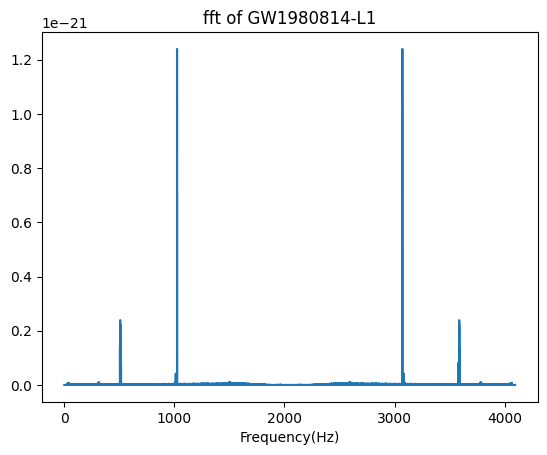

In [ ]:
plt.plot(data1_freq,abs(fft_data1))
plt.xlabel('Frequency(Hz)')
plt.title('fft of GW1980814-L1')

(50.0, 250.0)

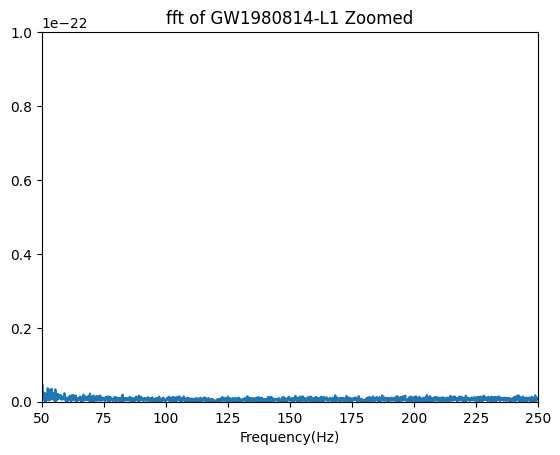

In [ ]:
plt.plot(data1_freq,abs(fft_data1))
plt.xlabel('Frequency(Hz)')
plt.title('fft of GW1980814-L1 Zoomed')

plt.ylim([0,0.1e-21])
plt.xlim([50,250])
#nyquist frequecy is at 2000Hz

In [ ]:
#t_human=1/10
N_win_L=2**11 #N_w
2**math.ceil(np.log2(N_win_L)) # get the power of 2
window=np.hanning(N_win_L)
#window=np.ones(N_win_L)
#window=np.hanning(N_win_L)
# we need now to slide the window over all the signal and each time we do the fourier in the windiow interval
s=16 #slide
Ns_L=int(math.floor(len(data1)-N_win_L)/(N_win_L/s))

L_Matrix=np.zeros((N_win_L,Ns_L),complex)

for i in range(Ns_L):
  L_Matrix[:,i]=np.fft.fft(data[int((N_win_L/s)*i):int((N_win_L/s)*i+N_win_L)]*window)

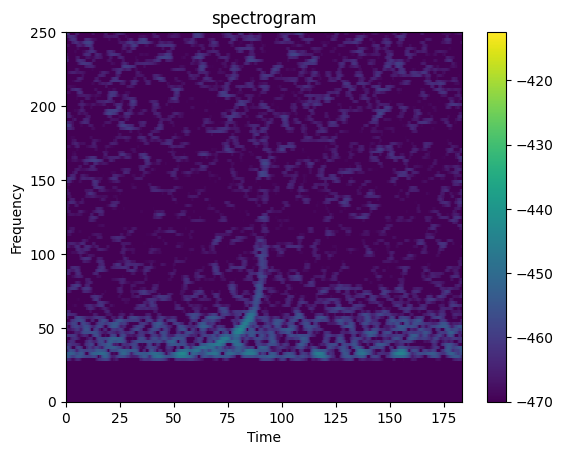

In [ ]:
freqsp = np.arange(N_win_L) * data1_fs / N_win_L
timesp = np.arange(Ns_L) * N_win_L / (data1_fs)

# Create the pseudocolor plot
fig, ax = plt.subplots()
pc = ax.pcolorfast(timesp, freqsp, 10 * np.log(abs(L_Matrix)),vmin=-470)

# Set the limit magnitude
limit_magnitude = 4e-20

# Set the edge color based on the limit magnitude
#for spine in ax.spines.values():
   # if spine.spine_type == "bottom" or spine.spine_type == "top":
  #      spine.set_edgecolor('red' if limit_magnitude >= 0 else 'blue')
 #   elif spine.spine_type == "left" or spine.spine_type == "right":
#        spine.set_edgecolor('red' if limit_magnitude <= 0 else 'blue')

ax.set_title('spectrogram')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_ylim([0, 250])

# Show the colorbar
plt.colorbar(pc)

# Show the plot
plt.show()


# **What do we conclude?**

from our analysis, we where able to spot the general expected form of the gravitiational waves data, especially the chirping peak at the end, meaning that we have sucessfully retreived the general shape of the data.

#  **What's next?**

while the spectrogram seperates the noise from the signal, we will still try to apply some **filtering** on the data to **get rid of the noise** and reconstruct the spectrogram

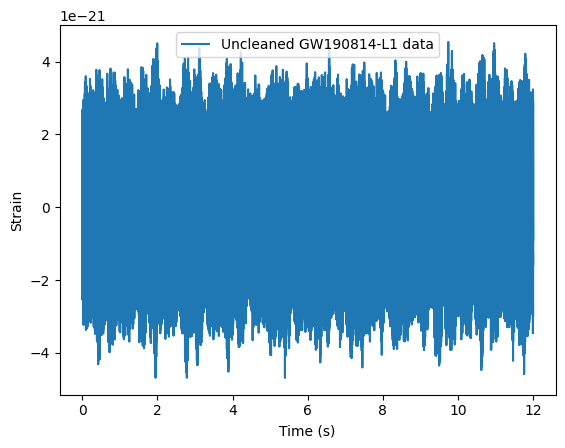

In [ ]:
#For GW190814-L1-BH:

data1=np.loadtxt('GW190814-L1-BH.txt')
N=len(data1)
data1_fs=4096 # Hz frequency
data1_time=(np.arange(len(data1)))/(data1_fs)
data1_time

# we will be converting our data into a time series since we will
# be using some libraries that makes it easier to deal with
# than a numpy array

data1_timeseries = TimeSeries(data1, delta_t=1/data1_fs)
# end of conversion


pylab.plot(data1_timeseries.sample_times,data1_timeseries,label='Uncleaned GW190814-L1 data')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

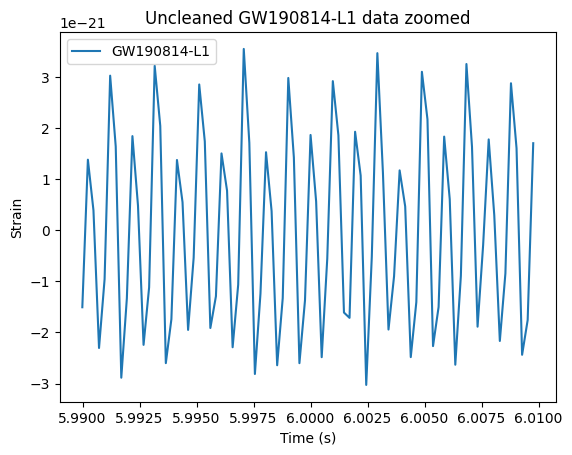

In [ ]:
# zoomed look on the data before cleaning it:
GPS_time=1249852257
zoom = data1_timeseries.time_slice( 6- .01, 6  + 0.01)
pylab.plot(zoom.sample_times, zoom, label='GW190814-L1')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.title('Uncleaned GW190814-L1 data zoomed')
pylab.legend()
pylab.show()

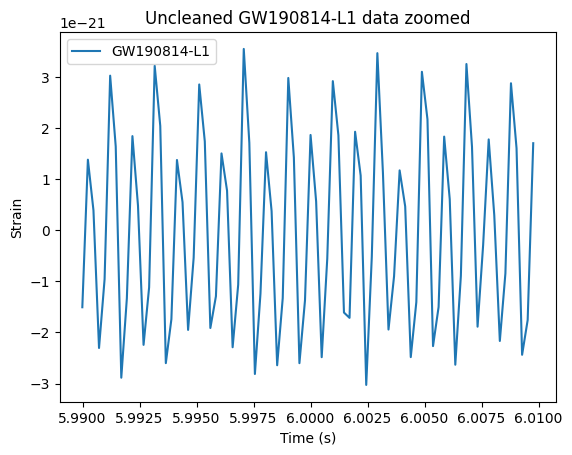

In [ ]:
zoom = data1_timeseries.time_slice( 6- .01, 6  + 0.01)
pylab.plot(zoom.sample_times, zoom, label='GW190814-L1')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.title('Uncleaned GW190814-L1 data zoomed')
pylab.legend()
pylab.show()

# **First step: High Pass Filtering**

As we have noticed in our analysis before, alot of noise on the low frequency level have been observed. Therefore, we will apply a highpass filter to the data as it will suppresses the low frequency content of the data.

 We choose here a finite-impulse-response(FIR).Options:

 1) highpass frequency

 2) half sample length of highpass filter: higher value will give less ripple in passband

we will choose to highpass the data at a threshold of **15 Hz** as there is no contribution below that frequency.


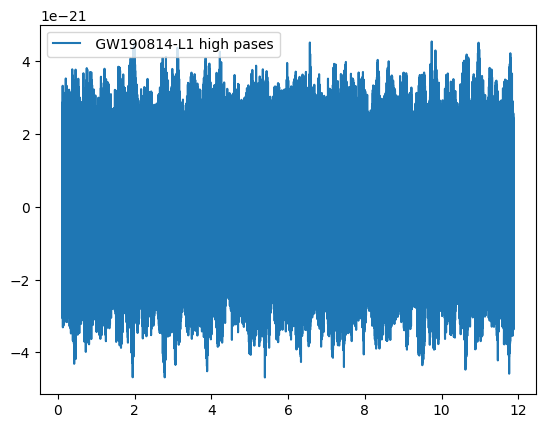

In [ ]:
high_data = data1_timeseries.highpass_fir(15, 512) # Highpass point is 15 Hz

pylab.plot(high_data.sample_times, high_data, label=' GW190814-L1 high pases')

pylab.legend()
pylab.show()

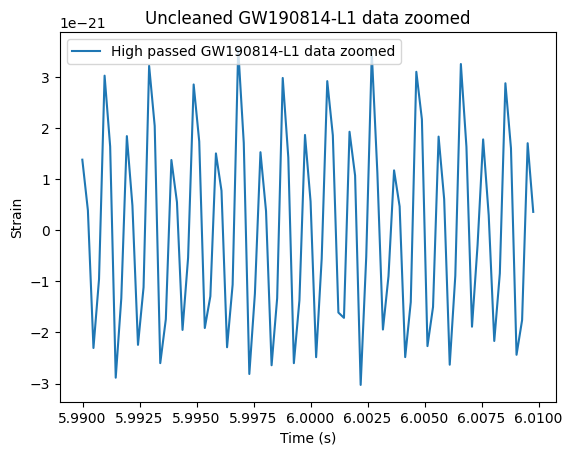

In [ ]:
zoom = high_data.time_slice( 6- .01, 6  + 0.01)
pylab.plot(zoom.sample_times, zoom, label='High passed GW190814-L1 data zoomed')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.title('Uncleaned GW190814-L1 data zoomed')
pylab.legend()
pylab.show()

# **Second step: power spectral density(PSD)**

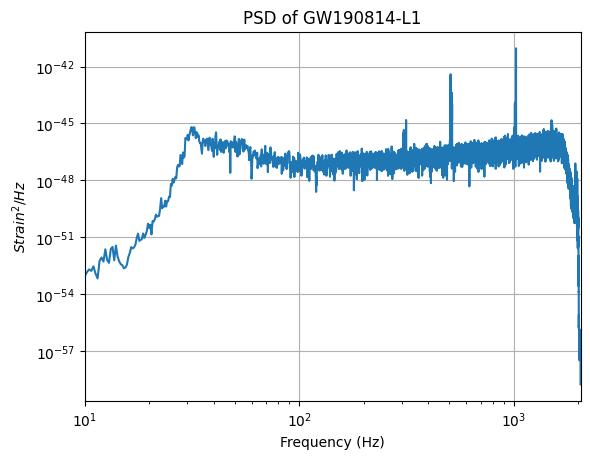

In [ ]:
# This estimates the PSD by sub-dividing the data into overlapping
# 4s long segments. (See Welch's method)
psd = data1_timeseries.psd(4)
# Note that the psd is a FrequencySeries!
pylab.loglog(psd.sample_frequencies, psd)
pylab.title('PSD of GW190814-L1')
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.grid()
pylab.xlim(10, 2048)
pylab.show()


# **Third Step: Whitening the data:**


To visualize deviations from the noise, it is useful to "whiten" the data within some frequency range. In this way excesses in the data are visible as deviations from zero. Whitening takes the data and attempts to make the power spectral density flat, so that all frequencies contribute equally.

Below we will whiten the data, and then bandpass the result to focus on the contributing frequency range.

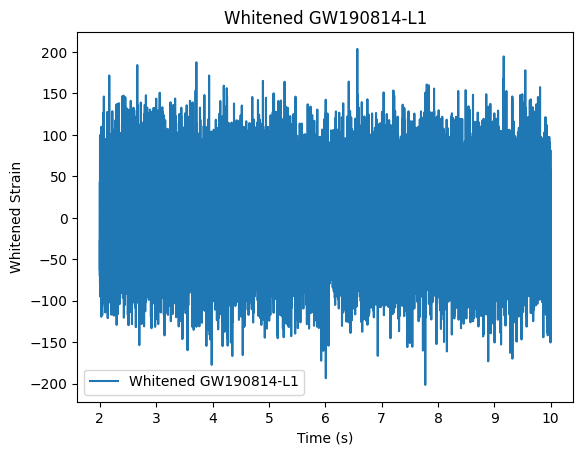

In [ ]:
# Whiten the data
whitened = {}

    # This produces a whitened set.
    # This works by estimating the power spectral density from the
    # data and then flattening the frequency response.
    # (1) The first option sets the duration in seconds of each
    #     sample of the data used as part of the PSD estimate.
    # (2) The second option sets the duration of the filter to apply
whitened = data1_timeseries.whiten(4, 4)

pylab.plot(whitened.sample_times, whitened, label='Whitened GW190814-L1')

pylab.title('Whitened GW190814-L1')
pylab.ylabel('Whitened Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

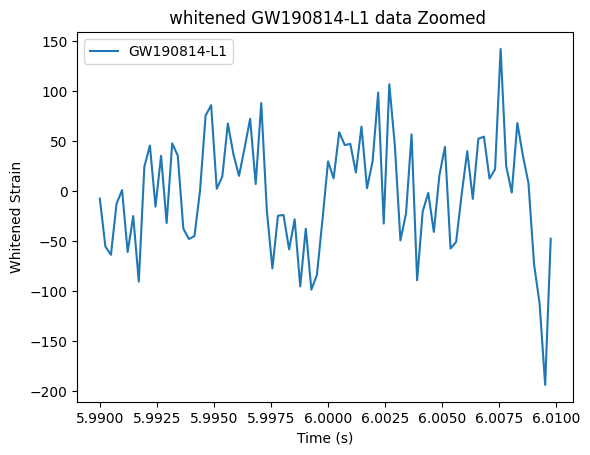

In [ ]:
# let's have a closer look on the data and zoom:
zoom2 = whitened.time_slice( 6- .01, 6  + 0.01)
pylab.plot(zoom2.sample_times, zoom2, label='GW190814-L1')
pylab.title(' whitened GW190814-L1 data Zoomed')
pylab.ylabel('Whitened Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()


# **step 4:**  **Applying Bandpass Filter**

We will now bandpass the data around GW150914 between 50 - 250 Hz. This will remove frequency ranges which won't contribute to this kind of signal and make it possible to see the signal in question

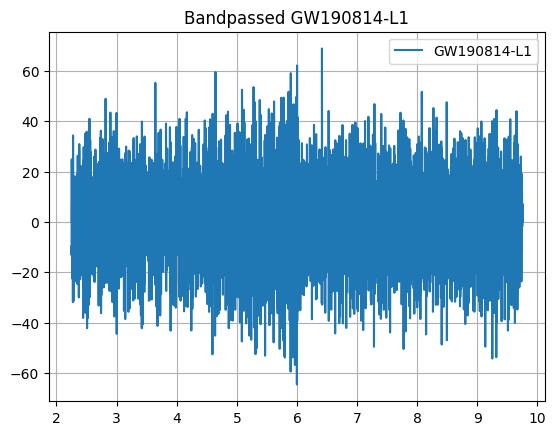

In [ ]:
# Apply a highpass filter (at 30 Hz) followed by an lowpass filter (at 250 Hz)
bpsd = whitened.highpass_fir(30, 512).lowpass_fir(250, 512)
pylab.plot(bpsd.sample_times, bpsd, label='GW190814-L1')
pylab.title('Bandpassed GW190814-L1')
pylab.grid()
pylab.legend()
pylab.show()

Text(0.5, 1.0, 'Zoomed bandpassed whitened GW190814-L1')

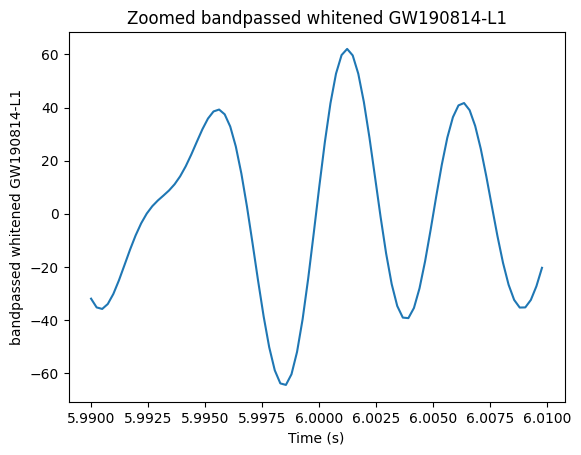

In [ ]:
zoom3 = bpsd.time_slice( 6- .01, 6  + 0.01)
pylab.plot(zoom.sample_times, zoom3, label='GW190814-L1')
pylab.ylabel('bandpassed whitened GW190814-L1')
pylab.xlabel('Time (s)')
pylab.title('Zoomed bandpassed whitened GW190814-L1')

Finally, we can now get the spectrogram of our cleaned data

# **Step Five: Spectrogram**

To get the spectrogram, we will be applying the Qtransform method on the data. The qtransform method returns a vector of the sample times, frequencies, and a 2-d vector of the power in each time-frequency bin. The free parameter is the choice of the Q-value. Larger Q-values
are generally more appropriate for viewing long duration features of the data and vice versa.

 The options here:

 (1) The time spacing for the output image (i.e. 1 ms in this case)

 (2) The number of frequency bins in the output, logarithmically spaced

 (3) The qrange to maximize over. We'll pick a constant at 8 here
     Typically higher values will be more appropriate for longer duration
     signals

 (4) The frequency range to output

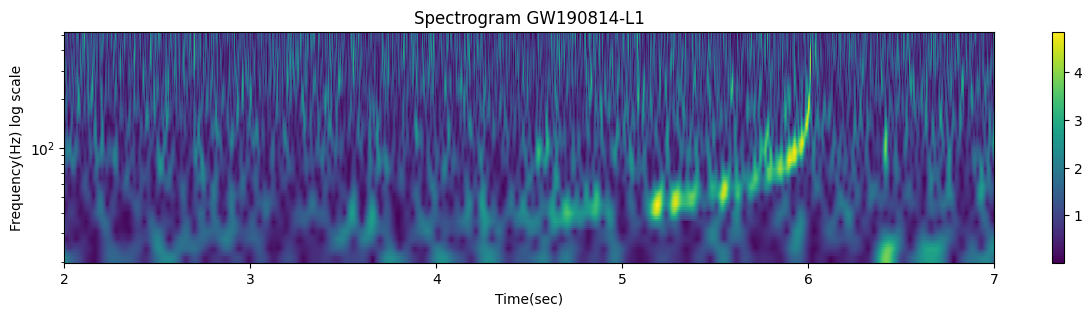

In [ ]:
GW190814L1_times, GW190814L1_freqs, GW190814L1_power = whitened.qtransform(.001, logfsteps=100,
                                                qrange=(8, 8),
                                                frange=(20, 512),
                                         )
pylab.figure(figsize=[15, 3])
pylab.pcolormesh(GW190814L1_times, GW190814L1_freqs, GW190814L1_power**0.5)
pylab.title('Spectrogram GW190814-L1')
pylab.colorbar()
pylab.xlim([2,7])
pylab.yscale('log')
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz) log scale')
pylab.show()



# **GW190814-H1 Analysis**

Both  GW190814-H1 and GW190814-L1 are data record of the same binary system merger of GW190814 except that the first data was recorded by the LIGO's detector in Linvingston where as the second is recorded in LIGO's detector found in Hanford. With that being said, it is not necessarly that both detectors record the exact same data,| and we will try to study GW190814-H1 and try to compare to that of GW190814-L1

## Steps of analysis:

We will be follwoing the same analysis of the GW190814-L1:

1) visualizing the data in the time domain

2) Finding its fourier analysis

3) Creating the spectrogram

4) applying high pass filter

5)  finding the PSD graph

6)  Whitening the data

7) Applying bandpass filter

8) Re-visuializing the spectrogram after cleaning and comaparing it to that before cleaning.


In [ ]:
data=np.loadtxt('GW190814-H1-BH.txt')
data2=pd.DataFrame(data)
data2.describe()

,0
count,4.915200e+04
mean,2.421058e-25
std,1.047688e-20
min,-2.976830e-20
25%,-7.675095e-21
50%,1.192775e-23
75%,7.662605e-21
max,2.928410e-20


#**1) GW190814-H1 Time domain signal**

In [ ]:
N=len(data2)
data2_fs=4096 # Hz frequency
# creating the time array:
data2_time=(np.arange(len(data2)))/(data2_fs)
data2_time
# for convenience we will be converting the data into a time series one:
data2_timeseries = TimeSeries(data2, delta_t=1/data2_fs)

Text(0.5, 0, 'Time(sec)')

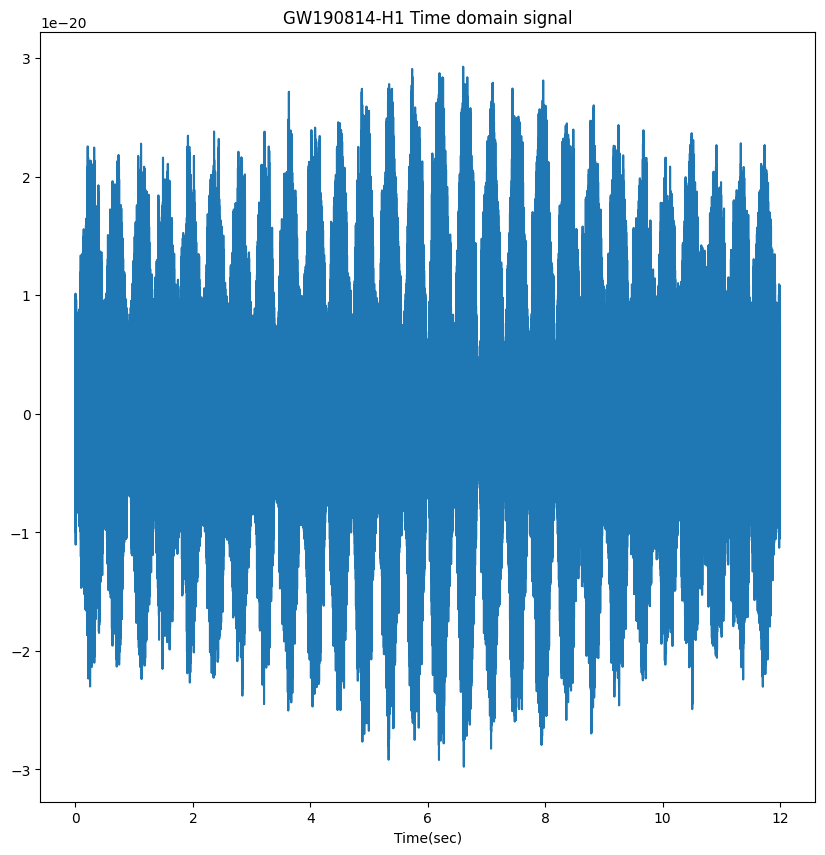

In [ ]:
#plotting the time domain signal of GW190814-H1:
plt.figure(figsize=(10,10))
plt.plot(data2_time,data2)
plt.title('GW190814-H1 Time domain signal')
plt.xlabel('Time(sec)')

Text(0, 0.5, 'Strains')

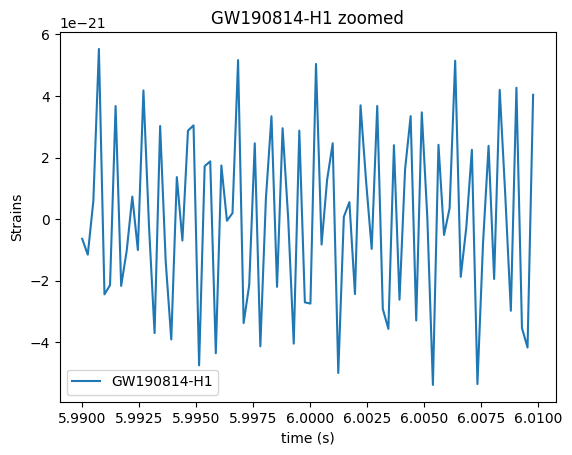

In [ ]:
# A zoomed look on the time domain data of GW190814-H1-BH:
zoom = data2_timeseries.time_slice( 6- .01, 6  + 0.01)
pylab.plot(zoom.sample_times, zoom, label='GW190814-H1')
pylab.legend()
pylab.title('GW190814-H1 zoomed')
pylab.xlabel('time (s)')
pylab.ylabel('Strains')


 From the time domain plot of the signal we can tell tha even though it is the same merger source, the two detectors still haven't detected the same signal. Nonetheless, we will continue our analysis and compare the two signals two the differnces between the clean spectrogram graph of the two data

#**2) GW190814-H1 Fourier Transform**

In [ ]:
# appy fourier transform
fft_data2= np.fft.ifft2(data2)
# creating the frequency domain:
data2_freq=np.arange(len(fft_data2))*(data2_fs/len(fft_data2))

Text(0.5, 1.0, 'fft of GW1980814-H1')

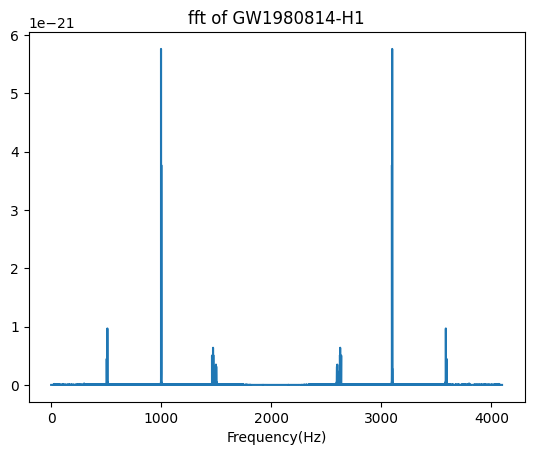

In [ ]:
plt.plot(data2_freq,abs(fft_data2))
plt.xlabel('Frequency(Hz)')
plt.title('fft of GW1980814-H1')

(50.0, 250.0)

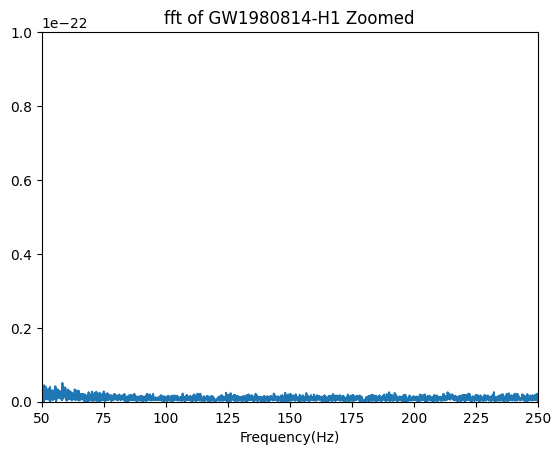

In [ ]:
# checking for noise at low amplitudes:

plt.plot(data2_freq,abs(fft_data2))
plt.xlabel('Frequency(Hz)')
plt.title('fft of GW1980814-H1 Zoomed')

plt.ylim([0,0.1e-21])
plt.xlim([50,250])




#3) **Spectrogram of GW190814-H1**

In [ ]:
#t_human=1/10
N_win2=2**11 #N_w
2**math.ceil(np.log2(N_win2)) # get the power of 2
window=np.hanning(N_win2)
#window=np.ones(N_win_piano)
#window=np.hanning(N_win_piano)
# we need now to slide the window over all the signal and each time we do the fourier in the windiow interval
s=16 #slide
Ns_H=int(math.floor(len(data2)-N_win2)/(N_win2/s))

H_Matrix=np.zeros((N_win2,Ns_H),complex)

for i in range(Ns_H):
  H_Matrix[:,i]=np.fft.fft(data[int((N_win2/s)*i):int((N_win2/s)*i+N_win2)]*window)

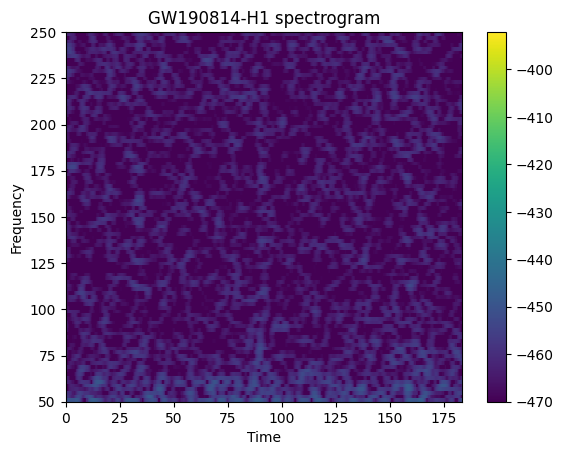

In [ ]:
freqsp = np.arange(N_win2) * data2_fs / N_win2
timesp = np.arange(Ns_H) * N_win2 / (data2_fs)

# Create the pseudocolor plot
fig, ax = plt.subplots()
pc = ax.pcolorfast(timesp, freqsp, 10 * np.log(abs(H_Matrix)),vmin=-470)

# Set the limit magnitude
limit_magnitude = 4e-20

# Set the edge color based on the limit magnitude
#for spine in ax.spines.values():
    #if spine.spine_type == "bottom" or spine.spine_type == "top":
     #   spine.set_edgecolor('red' if limit_magnitude >= 0 else 'blue')
    #elif spine.spine_type == "left" or spine.spine_type == "right":
     #   spine.set_edgecolor('red' if limit_magnitude <= 0 else 'blue')

ax.set_title('GW190814-H1 spectrogram')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_ylim([50, 250])

# Show the colorbar
plt.colorbar(pc)

# Show the plot
plt.show()


#**4) High pass filtering of GW190814-H1:**

 We choose here a finite-impulse-response(FIR).Options:

 1) highpass frequency

 2) half sample length of highpass filter: higher value will give less ripple in passband

we will choose to highpass the data at a threshold of **15 Hz** as there is no contribution below that frequency.

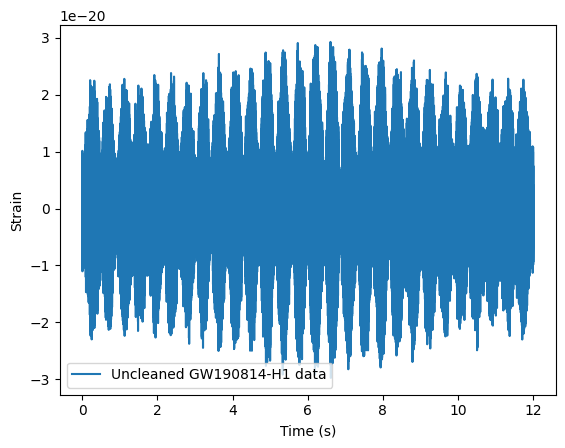

In [ ]:
#For GW190814-L1-BH:

data2=np.loadtxt('GW190814-H1-BH.txt')
N=len(data2)
data2_fs=4096 # Hz frequency
data2_time=(np.arange(len(data2)))/(data2_fs)
data2_time

# we will be converting our data into a time series since we will
# be using some libraries that makes it easier to deal with
# than a numpy array

data2_timeseries = TimeSeries(data2, delta_t=1/data2_fs)
# end of conversion


pylab.plot(data2_timeseries.sample_times,data2_timeseries,label='Uncleaned GW190814-H1 data')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

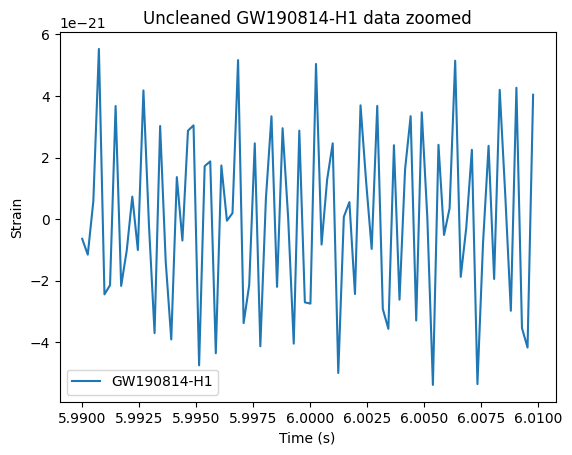

In [ ]:
# zoomed look on the data before cleaning it:
GPS_time=1249852257
zoom = data2_timeseries.time_slice( 6- .01, 6  + 0.01)
pylab.plot(zoom.sample_times, zoom, label='GW190814-H1')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.title('Uncleaned GW190814-H1 data zoomed')
pylab.legend()
pylab.show()

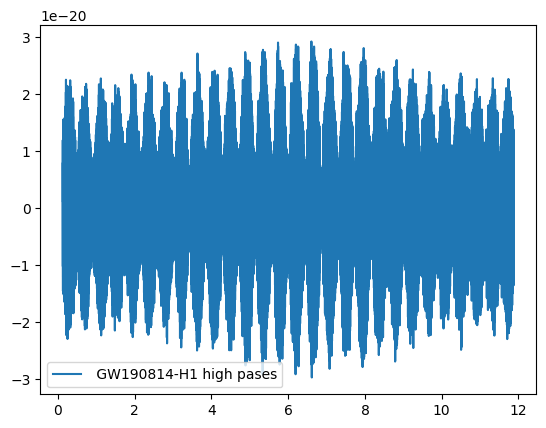

In [ ]:
high_data = data2_timeseries.highpass_fir(15, 512) # Highpass point is 15 Hz

pylab.plot(high_data.sample_times, high_data, label=' GW190814-H1 high pases')

pylab.legend()
pylab.show()

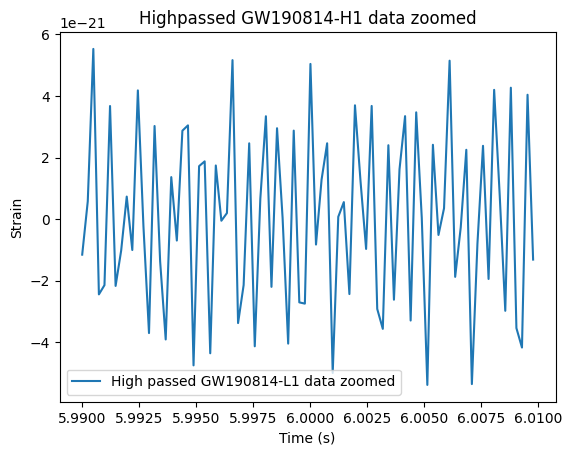

In [ ]:
zoom = high_data.time_slice( 6- .01, 6  + 0.01)
pylab.plot(zoom.sample_times, zoom, label='High passed GW190814-L1 data zoomed')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.title('Highpassed GW190814-H1 data zoomed')
pylab.legend()
pylab.show()

#**5) PSD graph of GW190814-H1**

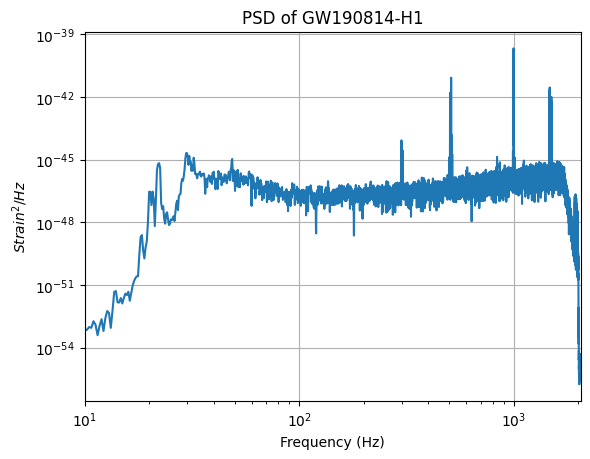

In [ ]:
# This estimates the PSD by sub-dividing the data into overlapping
# 4s long segments. (See Welch's method)
psd = data2_timeseries.psd(4)
# Note that the psd is a FrequencySeries!
pylab.loglog(psd.sample_frequencies, psd)
pylab.title('PSD of GW190814-H1')
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.grid()
pylab.xlim(10, 2048)
pylab.show()



#**6) Whitening the data:**



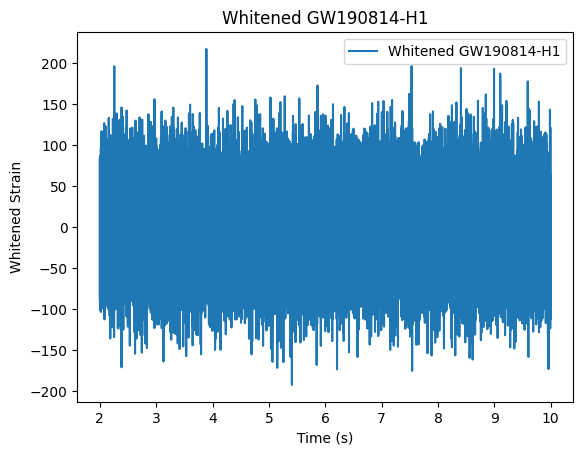

In [ ]:
# Whiten the data
whitened = {}

    # This produces a whitened set.
    # This works by estimating the power spectral density from the
    # data and then flattening the frequency response.
    # (1) The first option sets the duration in seconds of each
    #     sample of the data used as part of the PSD estimate.
    # (2) The second option sets the duration of the filter to apply
whitened = data2_timeseries.whiten(4, 4)

pylab.plot(whitened.sample_times, whitened, label='Whitened GW190814-H1')

pylab.title('Whitened GW190814-H1')
pylab.ylabel('Whitened Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

In [ ]:
np.shape(data2_timeseries)

(49152,)

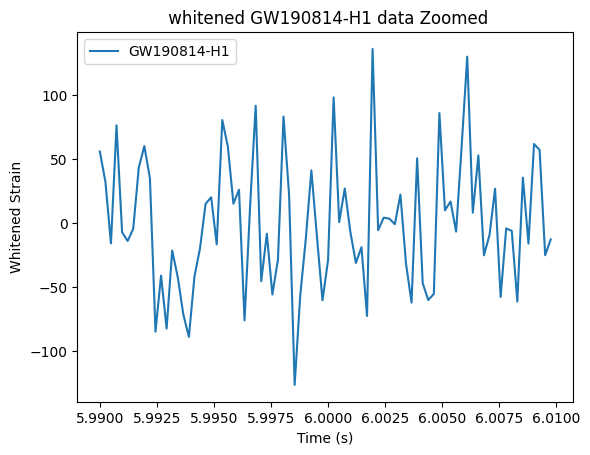

In [ ]:
# let's have a closer look on the data and zoom:
zoom2 = whitened.time_slice( 6- .01, 6  + 0.01)
pylab.plot(zoom2.sample_times, zoom2, label='GW190814-H1')
pylab.title(' whitened GW190814-H1 data Zoomed')
pylab.ylabel('Whitened Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()



# **step 7:**  **Applying Bandpass Filter on GW190814-H1**

Similarl to GW190814-L1, We will now bandpass the data around GW150914 between 50 - 250 Hz.

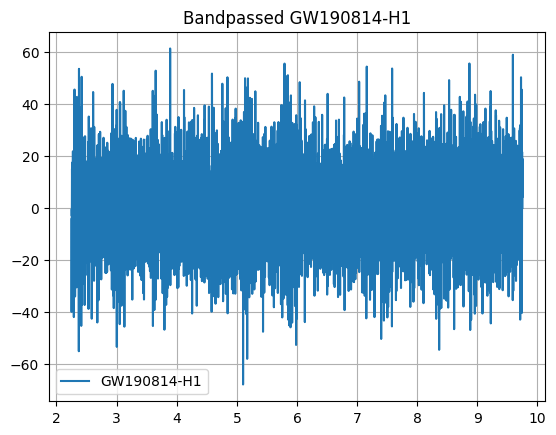

In [ ]:
# Apply a highpass filter (at 30 Hz) followed by an lowpass filter (at 250 Hz)
bpsd = whitened.highpass_fir(30, 512).lowpass_fir(250, 512)
pylab.plot(bpsd.sample_times, bpsd, label='GW190814-H1')
pylab.title('Bandpassed GW190814-H1')
pylab.grid()
pylab.legend()
pylab.show()

Text(0.5, 1.0, 'Zoomed bandpassed whitened GW190814-H1')

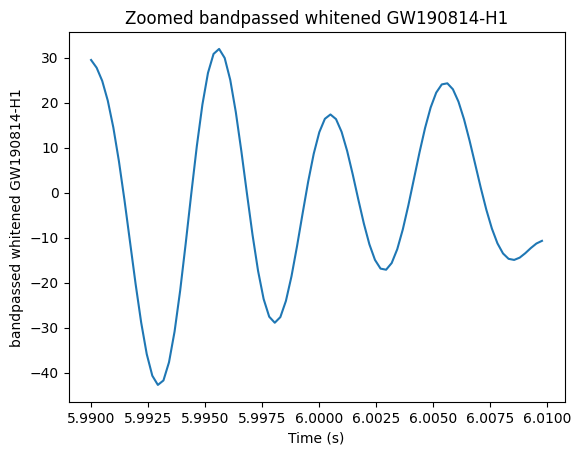

In [ ]:
zoom3 = bpsd.time_slice( 6- .01, 6  + 0.01)
pylab.plot(zoom.sample_times, zoom3, label='GW190814-H1')
pylab.ylabel('bandpassed whitened GW190814-H1')
pylab.xlabel('Time (s)')
pylab.title('Zoomed bandpassed whitened GW190814-H1')



# **Step 8: Spectrogram**

Similarly to GW190814-L1, we will use Qtransform where:

 (1) The time spacing for the output image (i.e. 1 ms in this case)

 (2) The number of frequency bins in the output, logarithmically spaced

 (3) The qrange to maximize over. We'll pick a constant at 8 here
     Typically higher values will be more appropriate for longer duration
     signals

 (4) The frequency range to output

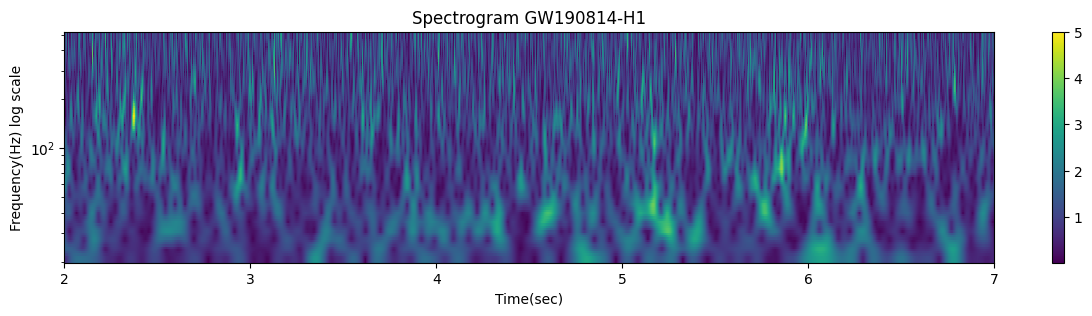

In [ ]:
GW190814H1_times, GW190814H1_freqs, GW190814H1_power = whitened.qtransform(.001, logfsteps=100,
                                                qrange=(8, 8),
                                                frange=(20, 512),
                                         )
pylab.figure(figsize=[15, 3])
pylab.pcolormesh(GW190814H1_times, GW190814H1_freqs, GW190814H1_power**0.5)
pylab.title('Spectrogram GW190814-H1')
pylab.colorbar()
pylab.xlim([2,7])
pylab.yscale('log')
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz) log scale')
pylab.show()

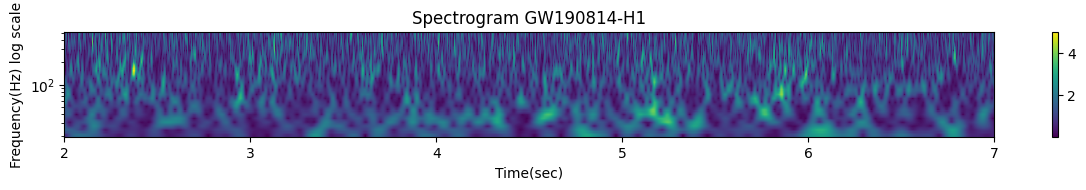

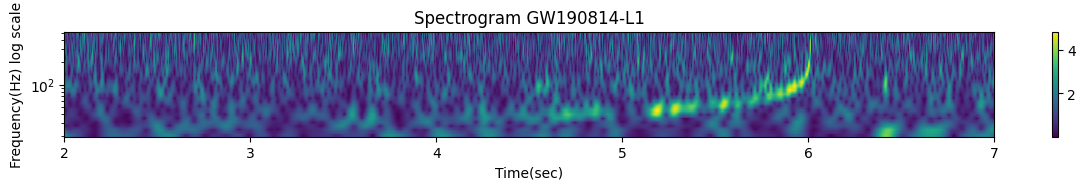

In [ ]:
# Plot both GW190814-H1 and GW190814-L1 Spectrograms:
pylab.figure(figsize=[15, 3])
plt.subplot(2,1,1)
pylab.pcolormesh(GW190814H1_times, GW190814H1_freqs, GW190814H1_power**0.5)
pylab.title('Spectrogram GW190814-H1')
pylab.colorbar()
pylab.xlim([2,7])
pylab.yscale('log')
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz) log scale')
#pylab.legend()
pylab.show()

pylab.figure(figsize=[15, 3])
plt.subplot(2,1,2)
pylab.pcolormesh(GW190814L1_times, GW190814L1_freqs, GW190814L1_power**0.5)
pylab.title('Spectrogram GW190814-L1')
pylab.colorbar()
pylab.xlim([2,7])
pylab.yscale('log')
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz) log scale')
#pylab.legend()
pylab.show()